In [40]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.feature_selection import SelectFromModel

In [12]:
Credit_Card_df = pd.read_csv("Resources/UCI_Credit_Card.csv")
Credit_Card_df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
Credit_Card_df.set_index('ID' , inplace = True)
Credit_Card_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [14]:
Credit_Card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

* There is no missing value.

In [15]:
Credit_Card_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
CreditCarddf=Credit_Card_df.copy()
CreditCarddf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [20]:
CreditCarddf.rename(columns={'default.payment.next.month':'default_pay'}, inplace=True)
CreditCarddf.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

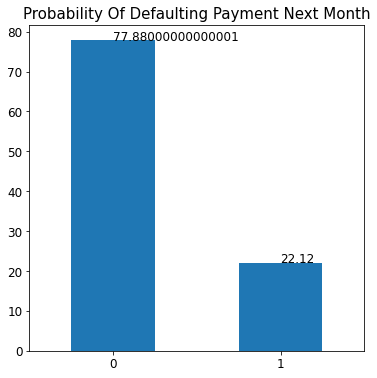

In [22]:
def_cnt = (CreditCarddf.default_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

77% clients are not expected to default payment whereas 23% clients are expected to default the payment. Here we can see that the class is heavily imbalanced.So we have to use some oversampling techniques

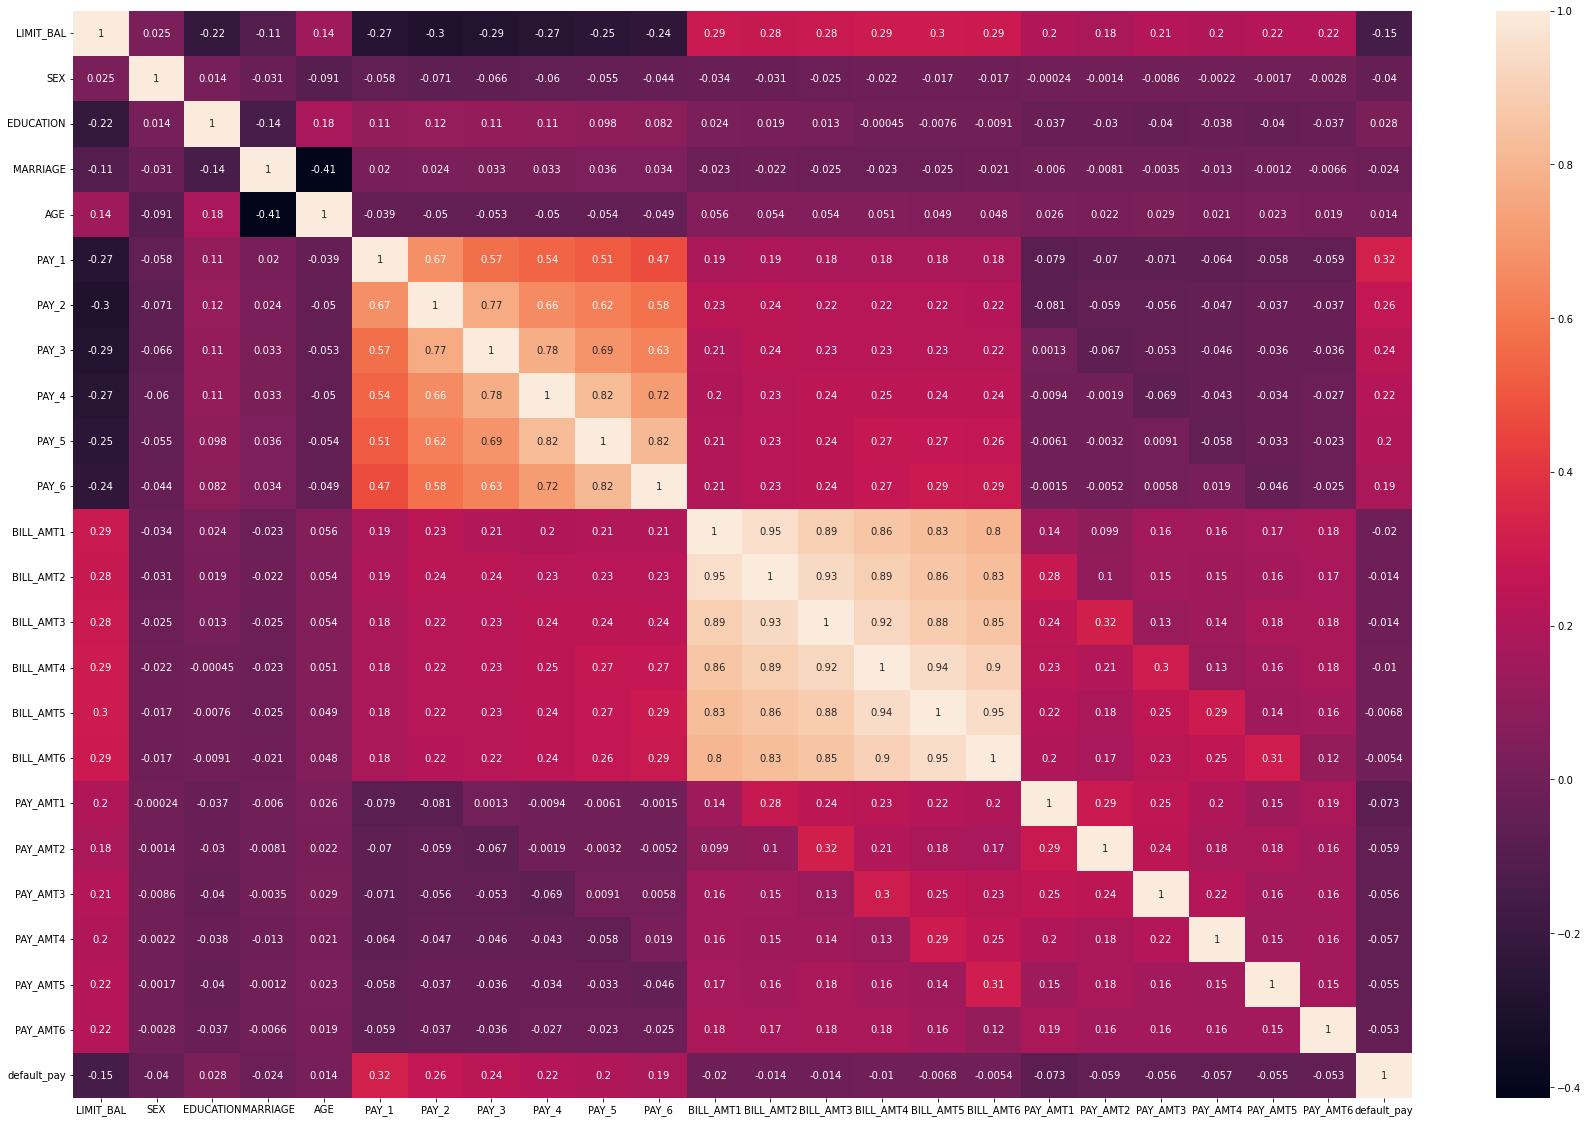

In [23]:
#checking bivariate correlation
plt.subplots(figsize=(30,20))
sns.heatmap(CreditCarddf.corr(), annot=True)
plt.show()

We can remove highly correlated features(Just need one of those features).We can also check the feature importance 

In [28]:
y=CreditCarddf[['default_pay']]
X=CreditCarddf.drop(['default_pay'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 42,stratify=y)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)



The shape of X_train is       (15000, 23)
The shape of X_test is        (15000, 23)
The shape of y_train is       (15000,)
The shape of y_test is        (15000,)


In [32]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [34]:
Counter(y_resampled)

Counter({1: 11682, 0: 11682})

In [35]:
RF= RandomForestClassifier(random_state=1, n_estimators=500).fit(X_resampled, y_resampled)
print(f'Training Score: {RF.score(X_resampled, y_resampled)}')
print(f'Testing Score: {RF.score(X_test, y_test)}')

Training Score: 0.9997003937681904
Testing Score: 0.8085333333333333


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred =RF.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[10741,   941],
       [ 1931,  1387]])

In [38]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     11682
           1       0.60      0.42      0.49      3318

    accuracy                           0.81     15000
   macro avg       0.72      0.67      0.69     15000
weighted avg       0.79      0.81      0.80     15000



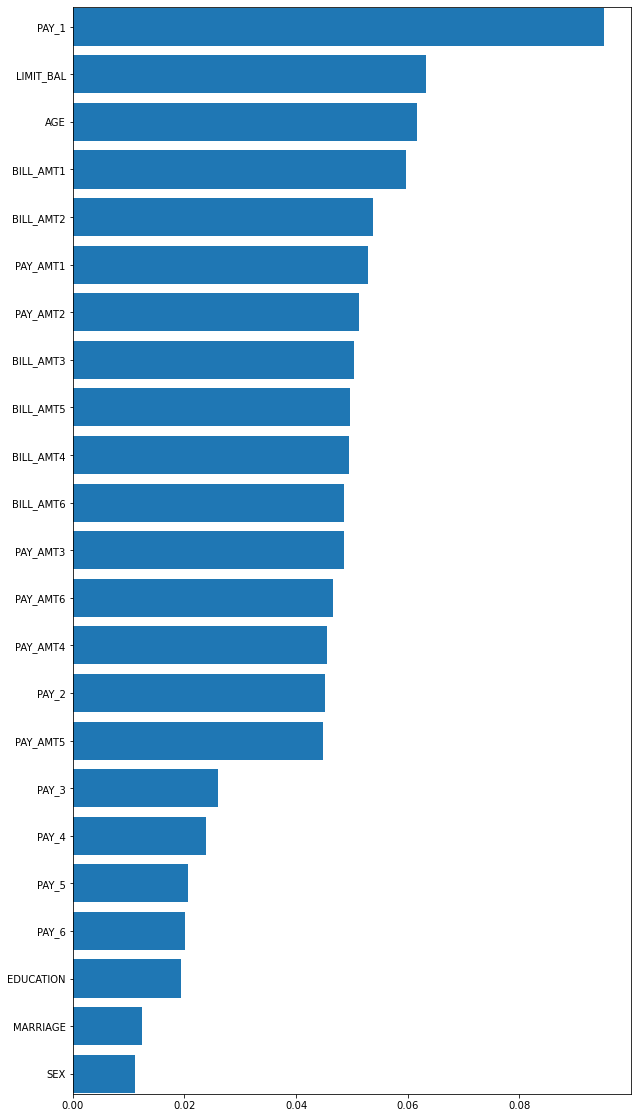

In [42]:
features =RF.feature_importances_
features = sorted(zip(X.columns,RF.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [41]:
sel = SelectFromModel(RF)
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True])

In [44]:
X.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'], dtype=object)

In [46]:
features=pd.DataFrame(X.columns.values,sel.get_support())
features

,0
True,LIMIT_BAL
False,SEX
False,EDUCATION
False,MARRIAGE
True,AGE
True,PAY_1
True,PAY_2
False,PAY_3
False,PAY_4
False,PAY_5


In [51]:
X_resampled.drop(['SEX','EDUCATION','MARRIAGE','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT4','PAY_AMT5'],axis=1)
X_test.drop(['SEX','EDUCATION','MARRIAGE','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT4','PAY_AMT5'],axis=1)

,LIMIT_BAL,AGE,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT6
ID,,,,,,,,,,,,,,
11020,360000.0,37,-1,0,725.0,1172.0,1619.0,1266.0,1212.0,1324.0,1002.0,1002.0,202.0,501.0
3622,210000.0,36,0,0,54717.0,55522.0,54929.0,55696.0,54773.0,51616.0,2017.0,1900.0,1900.0,1886.0
25842,330000.0,31,0,0,37426.0,40497.0,63646.0,39894.0,39860.0,39392.0,5000.0,3300.0,3195.0,3000.0
20046,230000.0,37,-2,-2,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,18.0,0.0,0.0,0.0
22002,260000.0,28,-2,-2,-28.0,5735.0,693.0,1557.0,685.0,11625.0,5763.0,703.0,1564.0,6997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,250000.0,41,-1,-1,390.0,390.0,390.0,1130.0,1683.0,2587.0,390.0,390.0,1130.0,0.0
26810,220000.0,32,0,0,100226.0,102103.0,103701.0,103673.0,99429.0,93487.0,5200.0,5500.0,4700.0,4000.0
727,360000.0,39,-1,-1,12865.0,4462.0,19560.0,8894.0,5329.0,998.0,4484.0,19623.0,222.0,9004.0


In [52]:
RF1= RandomForestClassifier(random_state=1, n_estimators=500).fit(X_resampled, y_resampled)
print(f'Training Score: {RF1.score(X_resampled, y_resampled)}')
print(f'Testing Score: {RF1.score(X_test, y_test)}')

Training Score: 0.9997003937681904
Testing Score: 0.8085333333333333
